In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cPickle

In [11]:
fill, filq = open('tmp_pres_lanczos100.pkl'), open('tmp_pres_quintic.pkl')
fils = open('/home/rosenberg/Documents/wl-bias-leaps-top/shear_bias_outputs/pres_sinc_rot_reconv_orig_nx3.pkl')
resl = cPickle.load(fill)
ress = cPickle.load(fils)
resq = cPickle.load(filq)
fill.close()
fils.close()
filq.close()

tfl = open('trueshearstmp.pkl')
trueShears = cPickle.load(tfl)
tfl.close()
thetas = np.radians(np.arange(0,91,5))

In [56]:
dsl, dsel = [], []
#quintic, sinc, lanczos
for orig, reconv in [resq, ress, resl]:
    recOrigDiff = (reconv - orig)[:,0,:]
    recOrigDiffMean, recOrigDiffStd = np.nanmean(recOrigDiff, axis=-1), np.nanstd(recOrigDiff, axis=-1)
    dsl.append(recOrigDiffMean)
    dsel.append(recOrigDiffStd)
diffShapes = np.stack(dsl).transpose(2,1,0)
diffShapesErr = np.stack(dsel).transpose(2,1,0)
mult = [1, 1000, 100]
scaleDS = (diffShapes * mult).transpose(2,0,1)
scaleDSE = (diffShapesErr * mult).transpose(2,0,1)
print scaleDSE.shape

(3, 2, 19)


In [57]:
scaleDS[0,0]

array([ 6.49073919e-02,  6.30639725e-02,  5.82642621e-02,  5.17963237e-02,
        4.44197324e-02,  3.63964438e-02,  2.78292000e-02,  1.88190440e-02,
        9.49590570e-03,  3.34842583e-05, -9.41253702e-03, -1.86874568e-02,
       -2.76208189e-02, -3.60879070e-02, -4.39949632e-02, -5.12486762e-02,
       -5.76012333e-02, -6.23154442e-02, -6.41303658e-02])

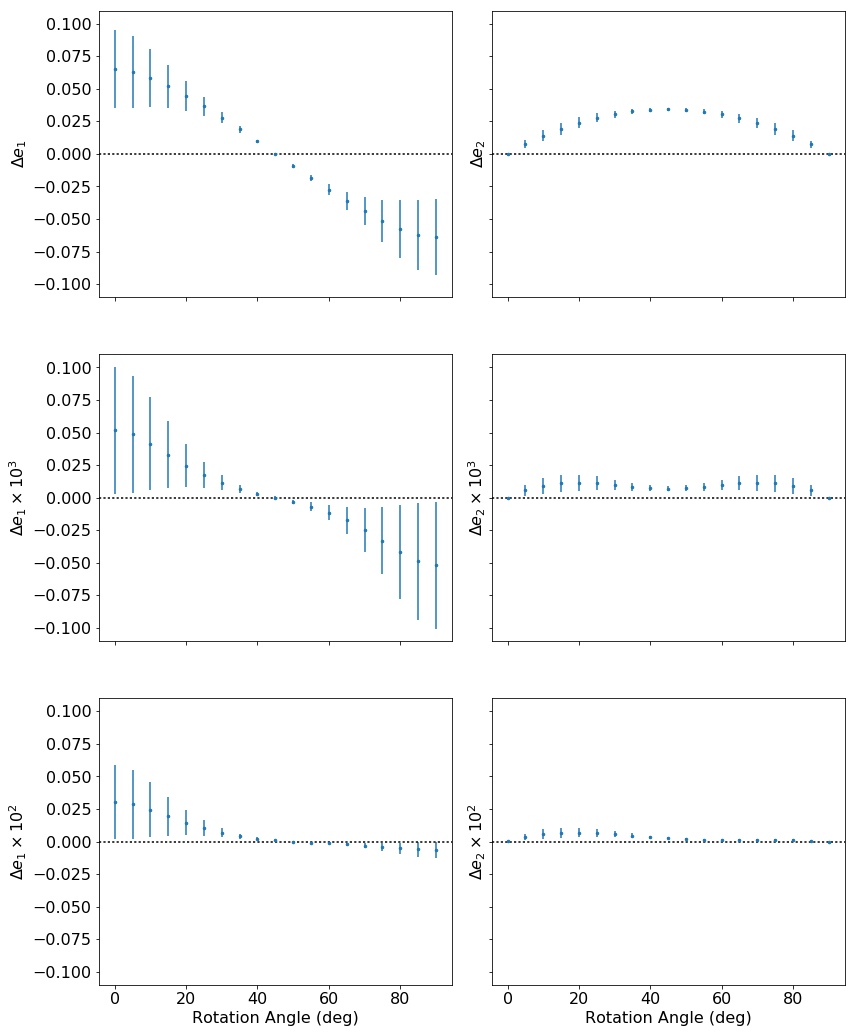

In [82]:
fig,ax = plt.subplots(3,2,figsize = (12,15),sharex=True, sharey=True)
string_multiplier = ['', r'  \times 10^3', r' \times 10^2']
titles = ['Quintic', 'Sinc', 'Lanczos100']
for i in range(3): # quintic, sinc, lanczos
    for j in range(2): #e1, e2
        sp = scaleDS[i,j]
        subax=ax[i, j]
        subax.errorbar(np.degrees(thetas), sp, yerr=scaleDSE[i,j], fmt='.', markersize=5)
        subax.axhline(0.0,c='k',linestyle=':')
        if i==2: 
            subax.xaxis.set_tick_params(labelsize=16)
            subax.set_xlabel('Rotation Angle (deg)', size=16)
        if j==0:
            subax.yaxis.set_tick_params(labelsize=16)
            subax.set_ylabel(r'$\Delta e_1'+string_multiplier[i]+'$', size=16)
        elif j==1:
            subax.set_ylabel(r'$\Delta e_2'+string_multiplier[i]+'$', size=16)
        
ax[0,0].set_ylim(-0.11,0.11)

#fig.suptitle('Quintic', size=16)
#ax[2,0].set_ylim(-0.004,0.0002)
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, top=0.95, left=0.12)


plt.savefig('/home/rosenberg/Documents/wl-bias-leaps-top/shear_bias_outputs/reconvolve_bias_rotation_errs_800nm_galos1_subpix3_pres.png')